# Entrega ejercicio Algoritmo Genético 


Lucía Chicharro, María Montero, Patricia Ramos y Lydia Sánchez-Cano.

Se trata de un técnica de optimización probabilística, que con frecuencia mejora a otros métodos clásicos en problemas difíciles. 

**El objetivo de este trabajo es encontrar los máximos de la función "picos"**

$$z = f(x,y) = 3(1-x)^2e^{-(x^2)-(y+1)^2}-10(x/5-x^3-y^5)e^{-x^2-y^2}-1/3e^{-(x+1)^2-y^2}$$

En el dominio:
$$\{x,y\} \in [-100,100]$$

La cadena cromosomática estará formada por dos genes (cromosomas) de la forma:
 $$[x_i, y_i]$$ con $$i = 1, 2, ... , n$$
La población inicial se elige de forma aleatoria porque queremos diversidad genética.


**Lo que necesitamos para resolver los Algotirmos Genéticos:**

Utilizaremos la librería de Python deap Documentación de deap

In [2]:
!pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 139 kB 34.4 MB/s 


In [3]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Necesitamos también la librería de Python de multiprocesamiento (mecanismo de paralelización) SCOOP Enlace al GitHub de SCOOP

In [4]:
!pip install scoop

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 615 kB 33.1 MB/s 
  Created wheel for scoop: filename=scoop-0.7.2.0-py3-none-any.whl size=78119 sha256=8734c544038f8e7e2c07292246d8ca3da5da4438cd3cb5f2d320aa7b413cd1a7
  Stored in directory: /root/.cache/pip/wheels/06/d1/b8/b4495d80f3aa67a67b8d19a900892d4f6af3c6d1bdd3cd015c
Successfully built scoop


**RESOLUCIÓN DEL PROBLEMA:**

Queremos diversidad genética por lo que la población inicial se elige de forma aleatoria 

In [5]:
import random
import math
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from math import e

En primer lugar,generaremos números aleatorios entre utilizando el módulo random, generando vectores pseudoaleatorios. Tras analizar analíticamente la función, hemos observado que debido a la exponencial para números no muy grandes la función toma valores cercanos a cero.Por ello, hemos decidido que el intervalo seleccionado sea [-3,3].

In [66]:
# Fijamos la semilla. Si no cambiamos la semilla, 
# la función generará los mismos número aleatorios
random.seed(0)
# Generamos los números pseudo-aleatorios.
x = [random.uniform(-3, 3) for i in range(100)]
y = [random.uniform(-3, 3) for i in range(100)]
print('x= ', x)
print('y= ', y)

x=  [2.0665311091502883, 1.5477264176418153, -0.47657051501493, -1.44649949824222, 0.0676483282116509, -0.5703951752975143, 1.702791534208636, -1.1801236435264353, -0.14041827508586513, 0.5002922367301874, 2.448677311172011, 0.028121134904341538, -1.308972933601777, 1.5348252249433436, 0.7102139800519898, -1.4969619518253567, 2.4584775358094406, 2.8967128562259186, 1.8613034159795374, 2.412995702637496, -1.1391145840840042, 1.3789904895607723, 2.393029727807961, 1.1039035914926476, -0.16714370728371986, -2.395792751589805, -0.3949689872772977, 0.6653218406628096, 2.4780663194273895, 2.799638206624553, -0.1379413406836978, 2.191859566629841, -1.4370461376482435, 1.8301669620781338, 0.29219582301353597, -2.9157497990158863, 1.3182281184237246, -0.6070587466543875, 1.9490698628893979, 1.0089192073911049, -2.9931430841134303, -0.038532801208051914, 2.205616652956685, -1.5365347386772081, -1.0487738235156596, 2.2228273926519275, -1.8535974509856568, 0.40506444372403116, -1.5683044283086789,

A continuación,visualizaremos nuestra función.

In [7]:
# Definimos la función objetivo
def funcion_prueba(x):
    # x es x[0] e y es x[1]
    res=3*((1-x[0])**2)*(e**(-(x[0]**2)-((x[1]+1)**2)))-10*((x[0]/5)-(x[0]**3)-(x[1]**5))*(e**(-(x[0]**2)-(x[1]**2)))-1/3*(e**(-((x[0]+1)**2)-(x[1]**2)))
    return res


In [67]:

print(funcion_prueba(x))

0.22029278833886587


In [68]:
# Generamos vectores que barran todo el dominio
x = np.linspace(-3, 3, 1000)
y = np.linspace(-3, 3, 1000)
print('x= ', x)
print('y= ', y)

x=  [-3.         -2.99399399 -2.98798799 -2.98198198 -2.97597598 -2.96996997
 -2.96396396 -2.95795796 -2.95195195 -2.94594595 -2.93993994 -2.93393393
 -2.92792793 -2.92192192 -2.91591592 -2.90990991 -2.9039039  -2.8978979
 -2.89189189 -2.88588589 -2.87987988 -2.87387387 -2.86786787 -2.86186186
 -2.85585586 -2.84984985 -2.84384384 -2.83783784 -2.83183183 -2.82582583
 -2.81981982 -2.81381381 -2.80780781 -2.8018018  -2.7957958  -2.78978979
 -2.78378378 -2.77777778 -2.77177177 -2.76576577 -2.75975976 -2.75375375
 -2.74774775 -2.74174174 -2.73573574 -2.72972973 -2.72372372 -2.71771772
 -2.71171171 -2.70570571 -2.6996997  -2.69369369 -2.68768769 -2.68168168
 -2.67567568 -2.66966967 -2.66366366 -2.65765766 -2.65165165 -2.64564565
 -2.63963964 -2.63363363 -2.62762763 -2.62162162 -2.61561562 -2.60960961
 -2.6036036  -2.5975976  -2.59159159 -2.58558559 -2.57957958 -2.57357357
 -2.56756757 -2.56156156 -2.55555556 -2.54954955 -2.54354354 -2.53753754
 -2.53153153 -2.52552553 -2.51951952 -2.51351351

Text(0.5, 0, 'f(x,y)')

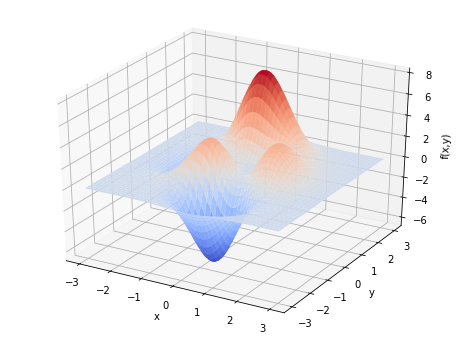

In [69]:
# Evaluamos todos los valores de las variables
x_ax, y_ax = np.meshgrid(x, y)
vals = np.c_[x_ax.ravel(), y_ax.ravel()]
fx = np.reshape([funcion_prueba(val) for val in vals],(1000, 1000))

# Representamos los resultados obtenidos
figure_3d = plt.figure(figsize=(8,6))
ax = figure_3d.gca(projection="3d")
ax.plot_surface(x_ax, y_ax, fx, cmap=cm.coolwarm)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")

#### 1. Definición del problema y generación de la población inicial

Importamos las librerías.

In [70]:
import random
from deap import base
from deap import creator
from deap import tools

##### 1.1 Creación del problema 

En primer lugar, definimos el tipo de problema que tenemos utilizando el método `create` de `creator`. Creamos una nueva clase llamada `"FitnessMax"`que hereda de `base=base.Fitness` ( con los atributos encargados de almacenar el desempeño y otros atributos) y contiene un atributo `attribute=weights` que determina el tipo de problema de optimización a resolver ( en nuestro caso, maximización).

Pese a que para visualizar la función hemos elegido el intervalo [-3,3], para realizar el algoritmo hemos analizado que es mejor utilizar el
intervalo [-2,2] ya que con el otro intervalo corremos el riesgo de quedarnos en un máximo local.

In [71]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

##### 1.2 Creación del tipo de individuo 

A continuación, creamos el tipo de individuo con sus atributos.Creamos la clase `Individual` que hereda de la clase `list` y que contiene el atributo `fitness` inicializado con `FitnessMax`.Un individuo es una lista con un atributo que almacenará la calidad o desempeño de si mismo.

In [72]:
creator.create("Individual", list, fitness=creator.FitnessMax)

##### 1.3 Creación de individuos aleatorios y población inicial. 

Definimos el objeto `Toolbox` que contiene funciones para crear individuos de forma aleatoria, para crear la población, operadores genéticos, función objetivo...

In [73]:
toolbox = base.Toolbox()

Mediante el método `register`, registramos la función `"attr_uniform"` para crear individuos aleatorios mediante `random.uniform`. Así, a cada gen del cromosoma se le asociará un valor aleatorio entre (-2,2).

In [74]:
# Generación de genes
toolbox.register("attr_uniform", random.uniform, -2, 2)

In [75]:
# Verificamos
toolbox.attr_uniform()

-0.21859124112468065

Creamos el individuo completo mediante la función `individual` que, a su vez, llama a la función `tools.initRepeat`. Esta función contiene el tipo de dato donde se almacenará el resultado (`creator.Individual`), función a la que se llama n veces (`toolbox.attr_uniform`) y número de veces que se llama a la función ( 2 ,número de cromosomas).

In [76]:
# Generación de inviduos
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 2)

In [77]:
# Ejemplo de un individuo aleatorio
individuo = toolbox.individual()
individuo

[-0.963092306211109, -1.3692537115107566]

Ahora sí, generamos la población.Utilizamos `population` que utiliza `initRepeat` para llamar 32 veces a la función `Individual`; el resultado se guarda en una lista.

In [78]:
# Generación de población
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 32)

In [79]:
# Ejemplo de creación de una población.
poblacion = toolbox.population()
print(poblacion)

[[0.11029252067045858, -0.0509375957238718], [0.2456197024577076, 1.02193906903473], [1.5355006169948036, -0.021669318498852785], [-0.7517670143325081, -0.13243105858990578], [1.2361834294414495, 1.5000653259210845], [1.2496597294550362, -1.247994823796688], [1.9976814378213215, 0.5323550396732015], [-1.6661317992970828, 0.9022174218452497], [1.9472859208205127, -0.3927327111498258], [0.7140600209678731, -0.7352914511146307], [-1.1459013517412155, 0.8692965732441489], [-1.9905697411225844, 1.290925642125663], [0.11338390743917115, -1.6088626327973627], [-1.5243844208610167, 0.5970616995846143], [1.4946152956013692, -0.8800690266925097], [1.9140607470935924, -1.599277243745164], [1.4157524383893527, -0.4132152906763822], [-1.6746183329270634, -0.9011446263229517], [-0.1880872607283428, 1.1693661247426088], [1.4454396145489445, -1.4663177831898038], [0.08346211365679546, 0.6031329525989491], [-0.6117879416015941, 1.4874553428423445], [-0.8863607391345578, -1.9257026898176193], [-1.837346

In [80]:
# Cada individuo tiene 2 componentes
poblacion[0]

[0.11029252067045858, -0.0509375957238718]

#### 2. Función objetivo y operadores genéticos

##### 2.1 Función Objetivo

In [82]:
def funcion_objetivo(x):
    """
    Función objetivo de nuestro problema
    """
    for i in range(len(x)):
        if x[i] > 2 or x[i] < -2:
            return -1,
    res = 3*((1-x[0])**2)*(e**(-(x[0])**2)-(x[1]+1)**2)-10*(x[0]/5-x[0]**3-x[1]**5)*e**(-x[0]**2-x[1]**2)-1/3*e**(-(x[0]+1)**2-x[1]**2)
    return res,

Como ya sabemos, si una solución no sumple las restricciones devolveremos -1 (es descartada, se aplica la pena de muerte)

Registramos la función de fitness.

In [83]:
toolbox.register("evaluate", funcion_objetivo)

In [84]:
# 
funcion_objetivo(individuo)
# 
toolbox.evaluate(individuo)

(-0.39955005196143,)

#### 3. Incorporar los operadores genéticos

**CRUCE**

Para realizar el cruce utilizaremos `mate` que permite que dos individuos seleccionados crucen su información genética para crear dos nuevos individuos.

In [85]:
# Un punto de cruce.
toolbox.register("mate", tools.cxOnePoint)

En primer lugar, aplicamos el crue en un punto. Para ello, selecciona de manera aleatoria un punto dentro de los individuos para hacer un intercambio entre la información genética de dos individuos seleccionados.

In [86]:
# Dos puntos de cruce.
toolbox.register("mate", tools.cxTwoPoint)

En segundo lugar, empleamos el cruce de dos puntos."Ejecuta un cruce de dos puntos en los individuos de la secuencia de entrada . Los dos individuos se modifican en su lugar y ambos mantienen su longitud original."

In [87]:
#Cruce Uniforme
toolbox.register("mate", tools.cxUniform)

Finalmente, aplicamos el cruce uniforme."Ejecuta un cruce uniforme que modifica en su lugar los dos individuos de la secuencia . Los atributos se intercambian según la probabilidad `indpb`".

**MUTACIÓN**

Para realizar la mutación utilizamos el operador `mutGaussian` el cual muta, con una probabilidad `indpb` cada uno de los genes del individuo, sumando a cada uno de ellos una cierta cantidad aleatoria .Con una media `mu` de 0 , una desviación típica `sigma` de 5.

In [88]:
toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)

Donde `indp` es la probabilidad de mutar cada uno de los genes del individuo.

**SELECCIÓN**

Utilizamos el operador `selTournament` para realizar una selección mediante torneo con un tamaño igual a 3.

In [89]:
toolbox.register("select", tools.selTournament, tournsize=3)

#### 4. Últimos pasos: Algoritmo genético como una caja negra

##### 4.1 Configuración del Algoritmo Genético 

Definimos la función `main()` para la configuaración.

In [90]:
# Definimos la semilla del generador de números aleatorios
random.seed(42)

In [91]:
# Definimos:
#  CXPB: Probabilidad de Cruce
#  MUTPB: Probabilidad de Mutación
#  NGEN: Número de Generaciones

CXPB, MUTPB, NGEN = 0.5, 0.2, 20

In [92]:
#Generamos la Población Inicial
pop = toolbox.population()
pop

[[0.557707193831535, -1.8999569791093323],
 [-0.899882726523523, -1.107157047404709],
 [0.9458848566560496, 0.7067979496916452],
 [1.5687182708193816, -1.6522446694823354],
 [-0.3123127212589183, -1.8808111222477186],
 [-1.1254481007855865, 0.02142115241344955],
 [-1.8938561212645455, -1.204649397253406],
 [0.5995377511180928, 0.1797659224128667],
 [-1.1182375118372132, 0.3570627355036349],
 [1.2377218267113066, -1.974004961287756],
 [1.2232770073312316, 0.7925575799529074],
 [-0.6389979339280325, -1.3780820007528738],
 [1.8288522888271248, -0.6536218195494929],
 [-1.6290166264794084, -1.613134492666144],
 [1.3899774653898391, 0.4149041254675643],
 [1.2285130930975208, 0.9189271467752715],
 [0.14491236581880296, 1.8924630559174824],
 [-0.4858624911665861, 0.208162525092908],
 [1.3176186570119794, 0.4740790094569842],
 [1.446827601243109, 0.30940858102704816],
 [0.8182873448596939, -1.8167024653773511],
 [-1.0884068973938126, -0.8424481455915713],
 [-1.68083209230549, -1.068836454555879

In [93]:
# Definimos el objeto hof que almacenará el mejor individuo 
# encontrado a lo largo de las generaciones.
hof = tools.HallOfFame(1)
hof

In [94]:
# Definimos un objeto para generar las estadísticas de la 
# población a lo largo de las generaciones del algoritmo
stats = tools.Statistics(lambda ind: ind.fitness.values)
print(stats)

stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

Ahora ya podemos ejecutar el algoritmo.
Para mayor claridad,comprimiremos todos los pasos en unos.

gen	nevals	avg     	std    	min     	max    
0  	30    	0.392431	2.36187	-4.70523	6.60742
1  	15    	1.97556 	1.9498 	-2.62476	6.60742
2  	18    	2.5416  	1.71996	-1.73846	6.60742
3  	24    	3.63988 	2.09332	0.157176	6.60742
4  	19    	4.81131 	2.47136	0.101994	6.60742
5  	11    	6.35687 	0.943255	2.4449  	6.60742
6  	22    	6.60742 	1.77636e-15	6.60742 	6.60742
7  	20    	6.35384 	1.36557    	-1      	6.60742
8  	17    	6.49575 	0.601332   	3.25748 	6.60742
9  	16    	6.48985 	0.633131   	3.08033 	6.60742
10 	14    	6.37323 	1.37315    	-1      	7.18926
11 	15    	6.15844 	1.92106    	-1      	7.18926
12 	23    	6.53119 	1.4242     	-1      	7.27315
13 	21    	6.44115 	2.00906    	-1      	7.27315
14 	17    	6.86922 	1.47572    	-1      	7.27315
15 	15    	6.64723 	2.54369    	-6.27125	7.27315
16 	15    	7.27315 	8.88178e-16	7.27315 	7.27315
17 	15    	6.99738 	1.48508    	-1      	7.27315
18 	18    	7.27315 	8.88178e-16	7.27315 	7.27315
19 	20    	6.72161 	2.06369    	-1      	7.2731

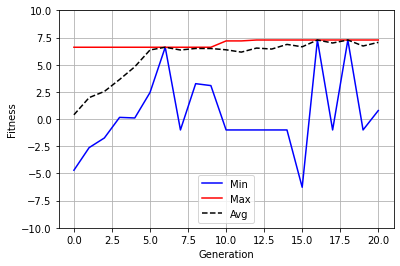

In [95]:
import random
import math
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import matplotlib.pyplot as plt

# Creamos los objetos para definir el problema y el tipo de individuo
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

def funcion_objetivo(x):
    """
    Función objetivo de nuestro problema
    """
    for i in range(len(x)):
        if x[i] > 2 or x[i] < -2:
            return -1,
    res=3*((1-x[0])**2)*(e**(-(x[0]**2)-((x[1]+1)**2)))-10*((x[0]/5)-(x[0]**3)-(x[1]**5))*(e**(-(x[0]**2)-(x[1]**2)))-1/3*(e**(-((x[0]+1)**2)-(x[1]**2)))
    return res,

toolbox = base.Toolbox()

# Generación de genes
toolbox.register("attr_uniform", random.uniform, -2, 2)

# Generación de inviduos y población
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 2)
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 30)

# Registro de operaciones genéticas
toolbox.register("evaluate", funcion_objetivo)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    #ax1.fill_between(gen, fit_mins, fit_maxs, where=fit_maxs >= fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.set_ylim([-10, 10])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

def main():
    # Definimos la semilla de los números aleatorios
    random.seed(42)
    # Definimos: probabilidad de cruce (CXPB), probabilidad de mutación (MUTPB)
    # y número de generaciones (NGEN).
    CXPB, MUTPB, NGEN = 0.5, 0.2, 20
    #Población inicial.
    pop = toolbox.population()
    #Objeto hof con el mejor individuo.
    hof = tools.HallOfFame(1)
    #Generamos las estadísticas.
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    # loogbook contendrá todo el registro de evolución
    logbook = tools.Logbook()
    #Aplicamos el algoritmo eaSimple que devuelve la población final y el registro.
    #Como entrada tenemos:
    # population= población inicial
    # toolbox= caja de herramientas con todas las funciones
    # cxpb =Probabilidad de cruce en tanto por uno.
    # mutpb = Probabilidad de mutación en tanto por uno.
    # ngen = Número de generaciones de generaciones del algoritmo
    # stats = Objeto estadístico con las funciones registradas (opcional)
    # halloffame =Objeto del tipo HallOfFame con los mejores individuos por generación, opcional
    # verbose = Si se deben mostrar o no las estadísticas 
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook


best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)

Como resultado, hemos obtenido los puntos máximos que ha encontrado la función (los que mejor se adaptan a la solución del problema) y coinciden con el valor del máximo global que representa la función. Se puede observar que a partir de la generación 11, el valor de los máximos de la población converge.

Veamos qué ocurre si utilizamos en cruce con dos puntos de cruce.

gen	nevals	avg     	std    	min     	max    
0  	30    	0.392431	2.36187	-4.70523	6.60742
1  	18    	1.34536 	1.50172	-2.55834	3.08995
2  	20    	2.11968 	1.148  	-1.08392	3.25353
3  	25    	1.63517 	1.74832	-1.82102	3.29441
4  	19    	2.62241 	1.64563	-1.73846	7.51805
5  	21    	2.4918  	1.50045	-1.63964	3.29441
6  	19    	3.2682  	0.102575	2.75331 	3.29441
7  	20    	3.29441 	4.44089e-16	3.29441 	3.29441
8  	19    	3.15127 	0.770871   	-1      	3.29441
9  	16    	3.00812 	1.07122    	-1      	3.29441
10 	20    	3.15127 	0.770871   	-1      	3.29441
11 	16    	3.14154 	0.770845   	-1      	3.29441
12 	20    	3.00812 	1.07122    	-1      	3.29441
13 	17    	3.15127 	0.770871   	-1      	3.29441
14 	11    	3.15127 	0.770871   	-1      	3.29441
15 	18    	3.29441 	4.44089e-16	3.29441 	3.29441
16 	21    	3.29441 	4.44089e-16	3.29441 	3.29441
17 	19    	3.00642 	0.939407   	-1      	3.29441
18 	18    	3.15444 	0.753794   	-0.904869	3.29441
19 	17    	3.29441 	4.44089e-16	3.29441  	3.29441


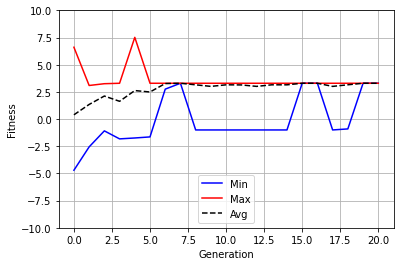

In [96]:
import random
import math
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import matplotlib.pyplot as plt

# Creamos los objetos para definir el problema y el tipo de individuo
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

def funcion_objetivo(x):
    """
    Función objetivo de nuestro problema
    """
    for i in range(len(x)):
        if x[i] > 2 or x[i] < -2:
            return -1,
    res=3*((1-x[0])**2)*(e**(-(x[0]**2)-((x[1]+1)**2)))-10*((x[0]/5)-(x[0]**3)-(x[1]**5))*(e**(-(x[0]**2)-(x[1]**2)))-1/3*(e**(-((x[0]+1)**2)-(x[1]**2)))
    return res,

toolbox = base.Toolbox()

# Generación de genes
toolbox.register("attr_uniform", random.uniform, -2, 2)

# Generación de inviduos y población
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 2)
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 30)

# Registro de operaciones genéticas
toolbox.register("evaluate", funcion_objetivo)
# Aplicamos el cruce en dos puntos.
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    #ax1.fill_between(gen, fit_mins, fit_maxs, where=fit_maxs >= fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.set_ylim([-10, 10])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

def main():

    random.seed(42)

    CXPB, MUTPB, NGEN = 0.5, 0.2, 20

    pop = toolbox.population()

    hof = tools.HallOfFame(1)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    logbook = tools.Logbook()

    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook


best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)

En la generación 4 aproximadamente, encontramos un individuo que se aproxima al valor óptimo del problema, sin embargo; a partir de la generación 5 el valor máximo se estabiliza en un máximo local.

Finalmente, aplicamos el cruce uniforme.

gen	nevals	avg     	std    	min     	max    
0  	30    	0.392431	2.36187	-4.70523	6.60742
1  	14    	1.68233 	1.79944	-2.62476	6.60742
2  	23    	2.88037 	1.74577	-1      	6.60742
3  	11    	4.6562  	2.07645	-1      	6.60742
4  	13    	5.99495 	1.48646	0.536054	6.60742
5  	20    	5.84668 	2.28223	-1      	6.60742
6  	19    	6.5653  	0.226791	5.344   	6.60742
7  	15    	6.18853 	2.2558  	-5.9593 	6.60742
8  	19    	6.60742 	1.77636e-15	6.60742 	6.60742
9  	19    	6.60742 	1.77636e-15	6.60742 	6.60742
10 	17    	6.35384 	1.36557    	-1      	6.60742
11 	10    	6.35384 	1.36557    	-1      	6.60742
12 	18    	6.60742 	1.77636e-15	6.60742 	6.60742
13 	12    	6.60742 	1.77636e-15	6.60742 	6.60742
14 	19    	6.35384 	1.36557    	-1      	6.60742
15 	19    	6.60742 	1.77636e-15	6.60742 	6.60742
16 	9     	6.35384 	1.36557    	-1      	6.60742
17 	20    	6.35384 	1.36557    	-1      	6.60742
18 	22    	5.84668 	2.28223    	-1      	6.60742
19 	23    	6.60742 	1.77636e-15	6.60742 	6.60742
20 	1

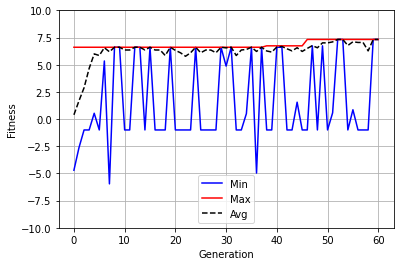

In [65]:
import random
import math
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import matplotlib.pyplot as plt

# Creamos los objetos para definir el problema y el tipo de individuo
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

def funcion_objetivo(x):
    """
    Función objetivo de nuestro problema
    """
    for i in range(len(x)):
        if x[i] > 2 or x[i] < -2:
            return -1,
    res=3*((1-x[0])**2)*(e**(-(x[0]**2)-((x[1]+1)**2)))-10*((x[0]/5)-(x[0]**3)-(x[1]**5))*(e**(-(x[0]**2)-(x[1]**2)))-1/3*(e**(-((x[0]+1)**2)-(x[1]**2)))
    return res,

toolbox = base.Toolbox()

# Generación de genes
toolbox.register("attr_uniform", random.uniform, -2, 2)

# Generación de inviduos y población
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 2)
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 30)

# Registro de operaciones genéticas
toolbox.register("evaluate", funcion_objetivo)
# Aplicamos el cruce uniforme.
toolbox.register("mate", tools.cxUniform,indpb=0.1)
toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    #ax1.fill_between(gen, fit_mins, fit_maxs, where=fit_maxs >= fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.set_ylim([-10, 10])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

def main():

    random.seed(42)
  #En este caso el número de generaciones es 60.
    CXPB, MUTPB, NGEN = 0.5, 0.2, 60

    pop = toolbox.population()

    hof = tools.HallOfFame(1)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    logbook = tools.Logbook()

    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook


best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)

Utilizando el mismo número de generaciones que en los otros apartados, vemos que el valor que muestra como resultado es 6,60.Sin embargo, si aumentamos el número de generaciones a 60 sí obtenemos un valor más próximo a nuestro máximo global.